In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import glob as gb
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


ModuleNotFoundError: No module named 'cv2'

# Classes

In [31]:
      code={'0':'Speed limit (20km/h)',
            "1":'Speed limit (30km/h)', 
            '2':'Speed limit (50km/h)', 
            '3':'Speed limit (60km/h)', 
            '4':'Speed limit (70km/h)', 
            '5':'Speed limit (80km/h)', 
            '6':'End of speed limit (80km/h)', 
            '7':'Speed limit (100km/h)', 
            '8':'Speed limit (120km/h)',
            '9':'No passing', 
            '10':'No passing veh over 3.5 tons', 
            '11':'Right-of-way at intersection', 
            '12':'Priority road', 
            '13':'Yield', 
            '14':'Stop', 
            '15':'No vehicles', 
            '16':'Veh > 3.5 tons prohibited', 
            '17':'No entry', 
            '18':'General caution', 
            '19':'Dangerous curve left', 
            '20':'Dangerous curve right', 
            '21':'Double curve', 
            '22':'Bumpy road', 
            '23':'Slippery road', 
            '24':'Road narrows on the right', 
            '25':'Road work', 
            '26':'Traffic signals', 
            '27':'Pedestrians',
            '28':'Children crossing', 
            '29':'Bicycles crossing', 
            '30':'Beware of ice/snow',
            '31':'Wild animals crossing', 
            '32':'End speed + passing limits', 
            '33':'Turn right ahead', 
            '34':'Turn left ahead', 
            '35':'Ahead only', 
            '36':'Go straight or right', 
            '37':'Go straight or left', 
            '38':'Keep right', 
            '39':'Keep left', 
            '40':'Roundabout mandatory', 
            '41':'End of no passing', 
            '42':'End no passing veh > 3.5 tons'
            }
def getcode(n):
    for x , y in code.items():
           if n==y or n==int(x):
                return y
            

# dataset Train view

In [32]:
trainpath ="C:\\Users\The_C\\Documents\\dataset\\traffic\\"
x_train = []
y_train = []
train_number=[]
x=[]
for folder in os.listdir(trainpath + 'Train'):
    files = gb.glob(pathname=str( trainpath + 'Train//'+folder+'/*.png'))
    train_number.append(np.array(len(files)))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(100,100))
        x_train.append(list(image_array))
        y_train.append(code[folder])
for i in range (43):
    x.append(getcode(i))


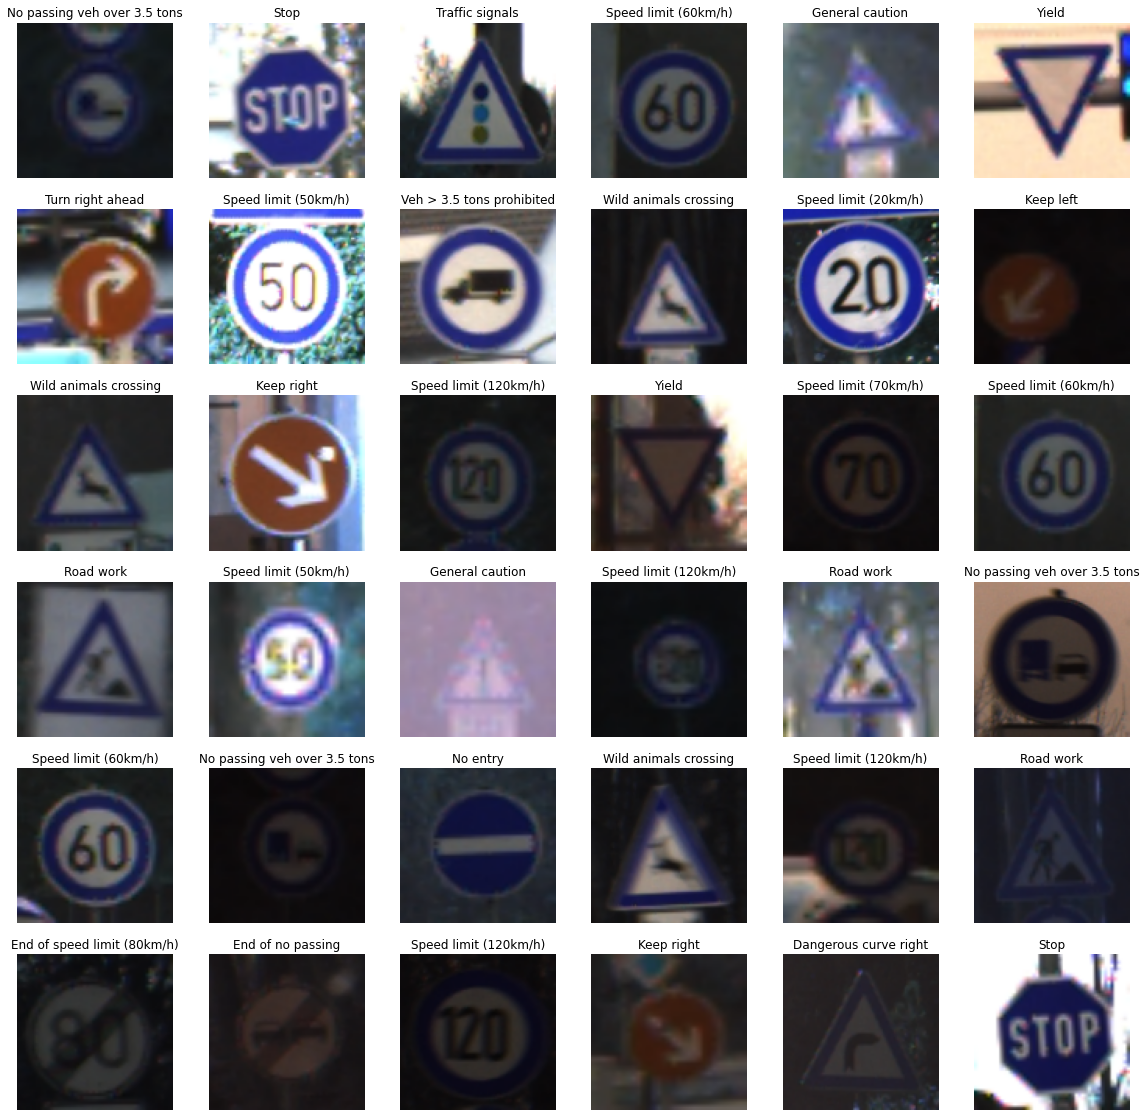

In [33]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
                            plt.subplot(6,6,n+1)
                            plt.imshow(x_train[i])
                            plt.axis('off')
                            plt.title(getcode(y_train[i]))

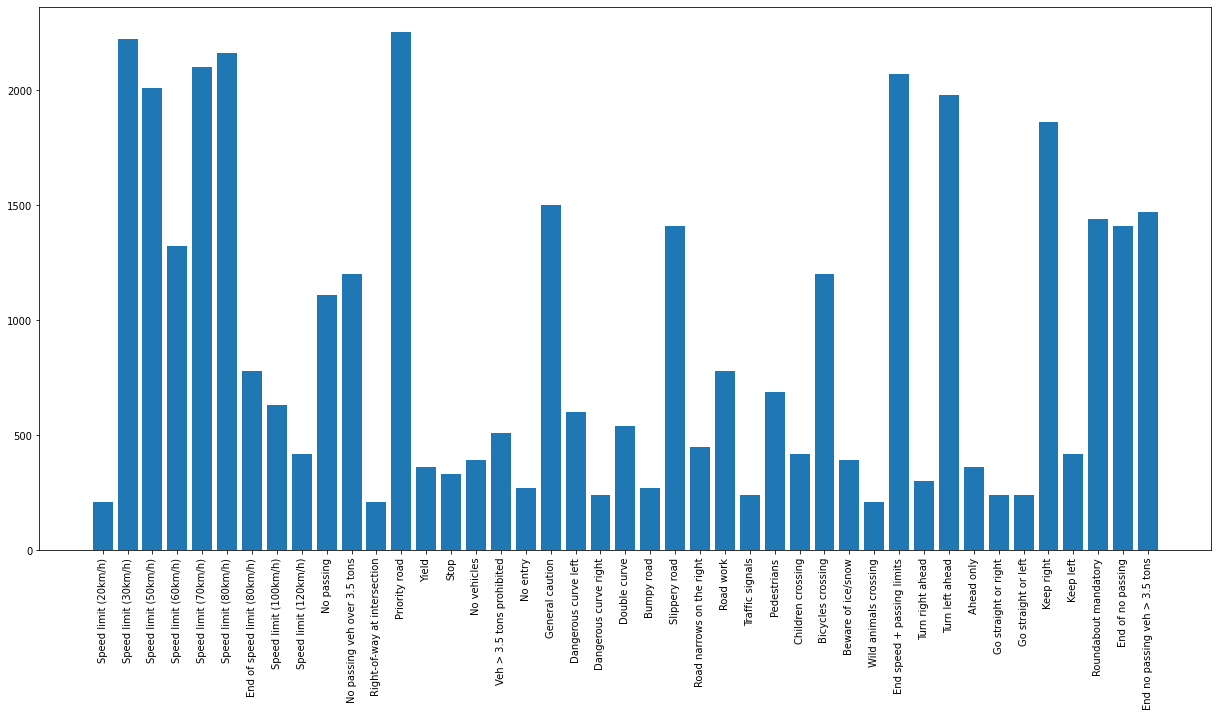

In [34]:
# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(x,np.array(train_number))
plt.xticks(x, rotation='vertical')
plt.show()

# Collect x_train and y_train

In [67]:
data = []
labels = []
classes = 43
cur_path = "C:\\Users\\The_C\\Documents\\dataset\\traffic"

In [68]:
  #Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


# data=x_train ,labels=y_train

In [69]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Split the dataset to trainning(X_train,Y_train)80% and testing(X_test,Y_test)20% 

In [70]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting the classes(Y_train,Y_test) to one hot encoding

In [71]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [72]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Model creation

In [73]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [74]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
print('Model details are :')
print(model.summary())

Model details are :
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0

# Model trainning

In [9]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model")


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 3100s 99ms/step - loss: 1.4725 - acc: 0.6301 - val_loss: 0.1856 - val_acc: 0.9597
Epoch 2/15
31367/31367 [==============================] - 3106s 99ms/step - loss: 0.3285 - acc: 0.9096 - val_loss: 0.0767 - val_acc: 0.9815
Epoch 3/15
31367/31367 [==============================] - 3102s 99ms/step - loss: 0.2321 - acc: 0.9355 - val_loss: 0.0697 - val_acc: 0.9823
Epoch 4/15
31367/31367 [==============================] - 3102s 99ms/step - loss: 0.2071 - acc: 0.9462 - val_loss: 0.0617 - val_acc: 0.9825
Epoch 5/15
31367/31367 [==============================] - 3105s 99ms/step - loss: 0.1889 - acc: 0.9509 - val_loss: 0.0553 - val_acc: 0.9855
Epoch 6/15
31367/31367 [==============================] - 3099s 99ms/step - loss: 0.1755 - acc: 0.9546 - val_loss: 0.0354 - val_acc: 0.9901
Epoch 7/15
31367/31367 [==============================] - 3097s 99ms/step - loss: 0.1809 - acc: 0.9553 - val_lo

# Accuracy and Loss of x_train and y_train graph

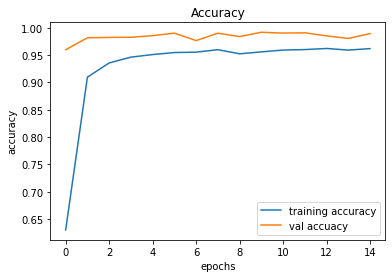

In [15]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuacy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Validation Accuracy and Loss of x_test and y_test graph 

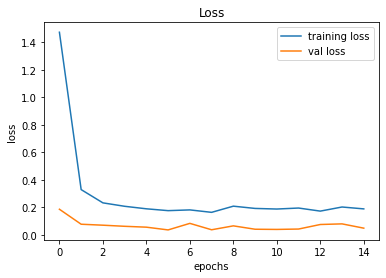

In [11]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy of the prediction

In [12]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
history=load_model("my_model")

In [13]:
y_test = pd.read_csv('prediction.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_pred=np.array(data)


In [14]:
prediction = history.predict_classes(X_pred)
print(prediction)
print(labels)

[16  1 38 ...  4  7 10]
[16  1 38 ...  6  7 10]


In [15]:
print(accuracy_score(labels, prediction))

0.956215360253365


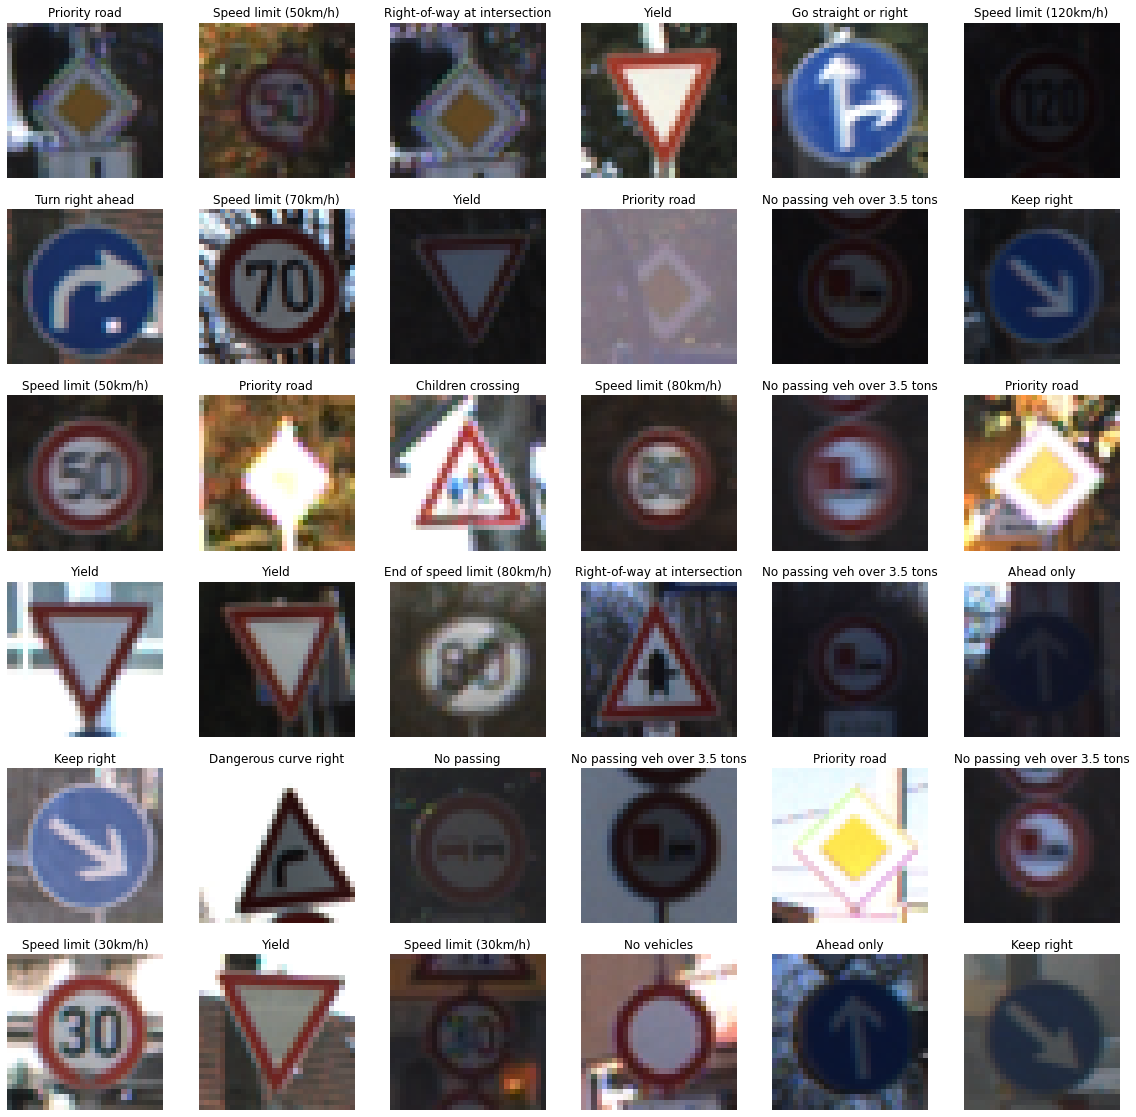

In [29]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))):
                            plt.subplot(6,6,n+1)
                            plt.imshow(X_pred[i])
                            plt.axis('off')
                            plt.title(getcode(prediction[i]))

In [ ]:
##model.save('my_model_acc')

# Creating GUI for testing the prediction

In [45]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [46]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

# initialise GUI

In [47]:

top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign recognition')
top.configure(background='#CDCDCD')

In [48]:
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

# image extraction and management

In [49]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    print(image.shape)
    pred = history.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

In [50]:
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

In [51]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [52]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

In [ ]:
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

(1, 30, 30, 3)
Speed limit (30km/h)
